In this project we'll perform Logistic Regression which is in fact just classification on a famous Titanic Dataset.
Let's get aboard and see why good and healthy lifestyle could tip the scales towards favourable outcome (ofc...unless someone's having suicidal thoughts) in life-death situations.

In [122]:
#import all the important libraries
import pandas as pd
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

In [123]:
#load in the data
#We've to perform split on the data.
df = pd.read_excel("titanic.xlsx")
#Replace all the NaN with 0.
df = df.fillna(0)
train, test = train_test_split(df, test_size = 0.2)


Remember: I've replaced 0 -> Female and 1 -> male

In [124]:
train.head(5)

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
334,2,0,"Banfield, Mr. Frederick James",1,28.0,0,0,C.A./SOTON 34068,10.5000,0,S,0,0.0,"Plymouth, Dorset / Houghton, MI"
765,3,1,"Dean, Mrs. Bertram (Eva Georgetta Light)",0,33.0,1,2,C.A. 2315,20.5750,0,S,10,0.0,"Devon, England Wichita, KS"
348,2,0,"Bracken, Mr. James H",1,27.0,0,0,220367,13.0000,0,S,0,0.0,"Lake Arthur, Chavez County, NM"
283,1,0,"Stewart, Mr. Albert A",1,0.0,0,0,PC 17605,27.7208,0,C,0,0.0,"Gallipolis, Ohio / ? Paris / New York"
240,1,1,"Romaine, Mr. Charles Hallace (""Mr C Rolmane"")",1,45.0,0,0,111428,26.5500,0,S,9,0.0,"New York, NY"


In [125]:
test.head()

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
2,1,0,"Allison, Miss. Helen Loraine",0,2.0,1,2,113781,151.5500,C22 C26,S,0,0.0,"Montreal, PQ / Chesterville, ON"
949,3,1,"Lang, Mr. Fang",1,26.0,0,0,1601,56.4958,0,S,14,0.0,0
913,3,1,"Karlsson, Mr. Einar Gervasius",1,21.0,0,0,350053,7.7958,0,S,13,0.0,0
933,3,0,"Kink, Mr. Vincenz",1,26.0,2,0,315151,8.6625,0,S,0,0.0,0
189,1,0,"Long, Mr. Milton Clyde",1,29.0,0,0,113501,30.0000,D6,S,0,126.0,"Springfield, MA"


In [126]:
#data ka shape dekh liya jaae
print("Training Data Shape:", train.shape)
#data ka shape dekh liya jaae
print("Testing Data Shape:", test.shape)#Accuracy Score on train dataset.

Training Data Shape: (1047, 14)
Testing Data Shape: (262, 14)


In [127]:
#Separation of independent and target variable on training data.
train_x = train.drop(columns=["survived", "name", "home.dest", "cabin", "embarked", "ticket", "boat", "body"], axis=1)
train_y = train["survived"]
#Separation of independent and target variable on testing data.
test_x = test.drop(columns=["survived", "name", "home.dest", "cabin", "embarked", "ticket", "boat", "body"], axis=1)
test_y = test["survived"]

In [128]:
train_x.head()

,pclass,sex,age,sibsp,parch,fare
334,2,1,28.0,0,0,10.5000
765,3,0,33.0,1,2,20.5750
348,2,1,27.0,0,0,13.0000
283,1,1,0.0,0,0,27.7208
240,1,1,45.0,0,0,26.5500


In [129]:
#fit the model -> basically ek object initialise kar rhe h abhi yahaa
model = LogisticRegression()
model.fit(train_x, train_y)

LogisticRegression()

In [130]:
#Let's get values of coefficients.
#But what are those coefficients.
print("Coefficients for the model: ", model.coef_)

Coefficients for the model:  [[-0.90523338 -2.59865659 -0.01409935 -0.22977728 -0.02829666  0.00376316]]


In [131]:
#Intercept for the model
print("Intercept of model", model.intercept_)

Intercept of model [3.42421608]


In [132]:
#Prediction of target on train dataset
predict_train = model.predict(train_x)
print("Target on train data", predict_train)

Target on train data [0 1 0 ... 0 0 0]


In [133]:
#Accuracy Score on train dataset
acc_train = accuracy_score(train_y, predict_train)
print("Accuracy Score on Train Dataset: ", acc_train)

Accuracy Score on Train Dataset:  0.7917860553963706


In [134]:
#Prediction of target on test dataset
predict_test = model.predict(test_x)
print("Target on test data: ", predict_test)

Target on test data:  [1 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 1 1 1 0 0 0 1 1 0 0 1 1 1 0 1 0
 0 1 0 0 1 0 1 1 0 0 1 0 1 0 0 1 0 0 0 0 1 0 1 1 1 0 1 0 0 1 1 1 0 0 0 0 0
 0 0 0 1 0 1 0 0 1 0 1 1 0 1 0 0 1 1 1 0 1 0 1 0 1 1 1 0 0 0 0 1 0 0 0 1 1
 0 0 0 1 0 0 0 0 0 1 0 0 1 0 0 0 0 1 0 0 1 0 0 0 1 1 0 1 0 0 1 1 0 1 1 0 0
 0 0 0 0 0 1 1 0 1 0 0 0 0 0 0 0 0 0 1 1 0 0 0 1 1 0 0 0 0 0 1 0 0 1 0 0 1
 0 0 1 0 1 1 0 1 0 1 1 1 0 1 0 0 0 0 0 1 1 0 0 1 0 0 1 0 1 0 0 1 0 0 0 0 1
 0 1 0 0 1 1 0 0 1 0 0 0 0 1 0 0 0 1 0 0 0 1 0 0 0 0 1 0 0 1 1 1 0 1 0 0 1
 0 0 0]


In [135]:
#Accuracy Score on test datatset
acc_test = accuracy_score(test_y, predict_test)
print("Accuracy Score on Test Dataset: ", acc_test)

Accuracy Score on Test Dataset:  0.7595419847328244


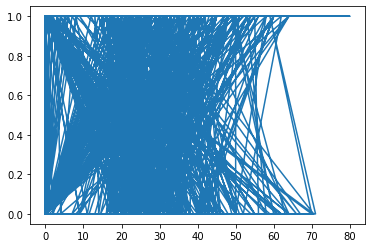

In [136]:
import matplotlib.pyplot as plt
plt.plot(train_x["age"], train_y)